In [1]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rt_iot2022 = fetch_ucirepo(id=942)

# data (as pandas dataframes)
X = rt_iot2022.data.features
#y = rt_iot2022.data.targets

# metadata
#print(rt_iot2022.metadata.additional_info)

# variable information
print(rt_iot2022.variables)


ConnectionError: Error connecting to server

In [ ]:
X

id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0           38667       1883   tcp    mqtt      32.011598             9   
1           51143       1883   tcp    mqtt      31.883584             9   
2           44761       1883   tcp    mqtt      32.124053             9   
3           60893       1883   tcp    mqtt      31.961063             9   
4           51087       1883   tcp    mqtt      31.902362             9   
...           ...        ...   ...     ...            ...           ...   
123112      59247      63331   tcp       -       0.000006             1   
123113      59247      64623   tcp       -       0.000007             1   
123114      59247      64680   tcp       -       0.000006             1   
123115      59247      65000   tcp       -       0.000006             1   
123116      59247      65129   tcp       -       0.000006             1   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
0                  5                  3                  3          0.281148   
1                  5                  3                  3          0.282277   
2                  5                  3                  3          0.280164   
3                  5                  3                  3          0.281593   
4                  5                  3                  3          0.282111   
...              ...                ...                ...               ...   
123112             1                  0                  0     167772.160000   
123113             1                  0                  0     144631.172400   
123114             1                  0                  0     167772.160000   
123115             1                  0                  0     167772.160000   
123116             1                  0                  0     167772.160000   

        ...    active.avg  active.std     idle.min     idle.max     idle.tot  \
0       ...  2.282415e+06         0.0  29729182.96  29729182.96  29729182.96   
1       ...  2.028307e+06         0.0  29855277.06  29855277.06  29855277.06   
2       ...  2.281904e+06         0.0  29842149.02  29842149.02  29842149.02   
3       ...  2.047288e+06         0.0  29913774.97  29913774.97  29913774.97   
4       ...  2.087657e+06         0.0  29814704.90  29814704.90  29814704.90   
...     ...           ...         ...          ...          ...          ...   
123112  ...  5.960464e+00         0.0         0.00         0.00         0.00   
123113  ...  6.914139e+00         0.0         0.00         0.00         0.00   
123114  ...  5.960464e+00         0.0         0.00         0.00         0.00   
123115  ...  5.960464e+00         0.0         0.00         0.00         0.00   
123116  ...  5.960464e+00         0.0         0.00         0.00         0.00   

           idle.avg  idle.std  fwd_init_window_size  bwd_init_window_size  \
0       29729182.96       0.0                 64240                 26847   
1       29855277.06       0.0                 64240                 26847   
2       29842149.02       0.0                 64240                 26847   
3       29913774.97       0.0                 64240                 26847   
4       29814704.90       0.0                 64240                 26847   
...             ...       ...                   ...                   ...   
123112         0.00       0.0                  1024                     0   
123113         0.00       0.0                  1024                     0   
123114         0.00       0.0                  1024                     0   
123115         0.00       0.0                  1024                     0   
123116         0.00       0.0                  1024                     0   

        fwd_last_window_size  
0                        502  
1                        502  
2                        502  
3                        502  
4                        502  
...                      ...  
123112                  1024  
123113      

### Checking Columns

In [ ]:
rt_iot2022.variables

name     role         type demographic description units  \
0              id.orig_p  Feature      Integer        None        None  None   
1              id.resp_p  Feature      Integer        None        None  None   
2                  proto  Feature  Categorical        None        None  None   
3                service  Feature   Continuous        None        None  None   
4          flow_duration  Feature   Continuous        None        None  None   
..                   ...      ...          ...         ...         ...   ...   
80  fwd_init_window_size  Feature      Integer        None        None  None   
81  bwd_init_window_size  Feature      Integer        None        None  None   
82  fwd_last_window_size  Feature      Integer        None        None  None   
83           Attack_type   Target  Categorical        None        None  None   
84                    id       ID      Integer        None        None  None   

   missing_values  
0              no  
1              no  
2              no  
3              no  
4              no  
..            ...  
80             no  
81             no  
82             no  
83             no  
84             no  

[85 rows x 7 columns]

###  (1) Checking missing values

In [ ]:
null_columns = X.isnull().any()
print(null_columns[null_columns == True])

Series([], dtype: bool)


In [ ]:
X.proto.unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [ ]:
X.service.unique()

array(['mqtt', '-', 'http', 'dns', 'ntp', 'ssl', 'dhcp', 'irc', 'ssh',
       'radius'], dtype=object)

In [ ]:
print(X.isnull().sum().sum())

0


In [ ]:
y = rt_iot2022.data.targets
y

Attack_type
0              MQTT_Publish
1              MQTT_Publish
2              MQTT_Publish
3              MQTT_Publish
4              MQTT_Publish
...                     ...
123112  NMAP_XMAS_TREE_SCAN
123113  NMAP_XMAS_TREE_SCAN
123114  NMAP_XMAS_TREE_SCAN
123115  NMAP_XMAS_TREE_SCAN
123116  NMAP_XMAS_TREE_SCAN

[123117 rows x 1 columns]

### Combining X and Y into 1 DataFrame

In [ ]:
df = X.copy()
df['Attack_Type'] = y
df

id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0           38667       1883   tcp    mqtt      32.011598             9   
1           51143       1883   tcp    mqtt      31.883584             9   
2           44761       1883   tcp    mqtt      32.124053             9   
3           60893       1883   tcp    mqtt      31.961063             9   
4           51087       1883   tcp    mqtt      31.902362             9   
...           ...        ...   ...     ...            ...           ...   
123112      59247      63331   tcp       -       0.000006             1   
123113      59247      64623   tcp       -       0.000007             1   
123114      59247      64680   tcp       -       0.000006             1   
123115      59247      65000   tcp       -       0.000006             1   
123116      59247      65129   tcp       -       0.000006             1   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
0                  5                  3                  3          0.281148   
1                  5                  3                  3          0.282277   
2                  5                  3                  3          0.280164   
3                  5                  3                  3          0.281593   
4                  5                  3                  3          0.282111   
...              ...                ...                ...               ...   
123112             1                  0                  0     167772.160000   
123113             1                  0                  0     144631.172400   
123114             1                  0                  0     167772.160000   
123115             1                  0                  0     167772.160000   
123116             1                  0                  0     167772.160000   

        ...  active.std     idle.min     idle.max     idle.tot     idle.avg  \
0       ...         0.0  29729182.96  29729182.96  29729182.96  29729182.96   
1       ...         0.0  29855277.06  29855277.06  29855277.06  29855277.06   
2       ...         0.0  29842149.02  29842149.02  29842149.02  29842149.02   
3       ...         0.0  29913774.97  29913774.97  29913774.97  29913774.97   
4       ...         0.0  29814704.90  29814704.90  29814704.90  29814704.90   
...     ...         ...          ...          ...          ...          ...   
123112  ...         0.0         0.00         0.00         0.00         0.00   
123113  ...         0.0         0.00         0.00         0.00         0.00   
123114  ...         0.0         0.00         0.00         0.00         0.00   
123115  ...         0.0         0.00         0.00         0.00         0.00   
123116  ...         0.0         0.00         0.00         0.00         0.00   

        idle.std  fwd_init_window_size  bwd_init_window_size  \
0            0.0                 64240                 26847   
1            0.0                 64240                 26847   
2            0.0                 64240                 26847   
3            0.0                 64240                 26847   
4            0.0                 64240                 26847   
...          ...                   ...                   ...   
123112       0.0                  1024                     0   
123113       0.0                  1024                     0   
123114       0.0                  1024                     0   
123115       0.0                  1024                     0   
123116       0.0                  1024                     0   

        fwd_last_window_size          Attack_Type  
0                        502         MQTT_Publish  
1                        502         MQTT_Publish  
2                        502         MQTT_Publish  
3                        502         MQTT_Publish  
4                        502         MQTT_Publish  
...                      ...                  ...  
123112                  1024  NMAP_XMAS_TREE_SCAN  
123113      

### NOTE: I add this step to bring attention that there are duplicates in our dataset.
### I have not removed the duplicates as this might not influece models such as deep learning or SVM.
### So for people who are chosen to do other algorithms, be aware of this.

In [ ]:
df[df.duplicated()]

id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
512         36685       1883   tcp       -            0.0             1   
513         36685       1883   tcp       -            0.0             1   
514         36685       1883   tcp       -            0.0             1   
515         36685       1883   tcp       -            0.0             1   
4324         5353       5353   udp     dns            0.0             1   
...           ...        ...   ...     ...            ...           ...   
119217       5353       5353   udp     dns            0.0             1   
119267      59342         80   tcp       -            0.0             1   
119706       5353       5353   udp     dns            0.0             1   
119833       5353       5353   udp     dns            0.0             1   
119834       5353       5353   udp     dns            0.0             1   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
512                0                  0                  0               0.0   
513                0                  0                  0               0.0   
514                0                  0                  0               0.0   
515                0                  0                  0               0.0   
4324               0                  1                  0               0.0   
...              ...                ...                ...               ...   
119217             0                  1                  0               0.0   
119267             0                  0                  0               0.0   
119706             0                  1                  0               0.0   
119833             0                  1                  0               0.0   
119834             0                  1                  0               0.0   

        ...  active.std  idle.min  idle.max  idle.tot  idle.avg  idle.std  \
512     ...         0.0       0.0       0.0       0.0       0.0       0.0   
513     ...         0.0       0.0       0.0       0.0       0.0       0.0   
514     ...         0.0       0.0       0.0       0.0       0.0       0.0   
515     ...         0.0       0.0       0.0       0.0       0.0       0.0   
4324    ...         0.0       0.0       0.0       0.0       0.0       0.0   
...     ...         ...       ...       ...       ...       ...       ...   
119217  ...         0.0       0.0       0.0       0.0       0.0       0.0   
119267  ...         0.0       0.0       0.0       0.0       0.0       0.0   
119706  ...         0.0       0.0       0.0       0.0       0.0       0.0   
119833  ...         0.0       0.0       0.0       0.0       0.0       0.0   
119834  ...         0.0       0.0       0.0       0.0       0.0       0.0   

        fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  \
512                      502                     0                   502   
513                      502                     0                   502   
514                      502                     0                   502   
515                      502                     0                   502   
4324                       0                     0                     0   
...                      ...                   ...                   ...   
119217                     0                     0                     0   
119267                 64240                     0                 64240   
119706                     0                     0                     0   
119833                     0                     0                     0   
119834                     0                     0                     0   

          Attack_Type  
512      MQTT_Publish  
513      MQTT_Publish  
514      MQTT_Publish  
515      MQTT_Publish  
4324      Thing_Speak  
...               ...  
119217  NMAP_UDP_SCAN  
119267  NMAP_UDP_SCAN  
119706  NMAP_UDP_SCAN  
119833  NMAP_UDP_SCAN  
119834  NMAP_UDP_SCAN  

[5195 rows x 84 col

### (2) Log transformation on Outliers

#### First I check if there are any negative values since Log will fill them with NaN

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
numerical_cols = df.select_dtypes(include=['number']).columns
(numerical_df < 0).any().any()

False

In [ ]:
numerical_cols = numerical_cols.drop(['id.orig_p','id.resp_p'])
df[numerical_cols] = df[numerical_cols].apply(lambda x: np.log(x+1))

In [ ]:
df

id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0           38667       1883   tcp    mqtt       3.496859      2.302585   
1           51143       1883   tcp    mqtt       3.492974      2.302585   
2           44761       1883   tcp    mqtt       3.500260      2.302585   
3           60893       1883   tcp    mqtt       3.495327      2.302585   
4           51087       1883   tcp    mqtt       3.493544      2.302585   
...           ...        ...   ...     ...            ...           ...   
123112      59247      63331   tcp       -       0.000006      0.693147   
123113      59247      64623   tcp       -       0.000007      0.693147   
123114      59247      64680   tcp       -       0.000006      0.693147   
123115      59247      65000   tcp       -       0.000006      0.693147   
123116      59247      65129   tcp       -       0.000006      0.693147   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
0           1.791759           1.386294           1.386294          0.247757   
1           1.791759           1.386294           1.386294          0.248637   
2           1.791759           1.386294           1.386294          0.246988   
3           1.791759           1.386294           1.386294          0.248104   
4           1.791759           1.386294           1.386294          0.248508   
...              ...                ...                ...               ...   
123112      0.693147           0.000000           0.000000         12.030368   
123113      0.693147           0.000000           0.000000         11.881949   
123114      0.693147           0.000000           0.000000         12.030368   
123115      0.693147           0.000000           0.000000         12.030368   
123116      0.693147           0.000000           0.000000         12.030368   

        ...  active.std   idle.min   idle.max   idle.tot   idle.avg  idle.std  \
0       ...         0.0  17.207640  17.207640  17.207640  17.207640       0.0   
1       ...         0.0  17.211872  17.211872  17.211872  17.211872       0.0   
2       ...         0.0  17.211432  17.211432  17.211432  17.211432       0.0   
3       ...         0.0  17.213830  17.213830  17.213830  17.213830       0.0   
4       ...         0.0  17.210512  17.210512  17.210512  17.210512       0.0   
...     ...         ...        ...        ...        ...        ...       ...   
123112  ...         0.0   0.000000   0.000000   0.000000   0.000000       0.0   
123113  ...         0.0   0.000000   0.000000   0.000000   0.000000       0.0   
123114  ...         0.0   0.000000   0.000000   0.000000   0.000000       0.0   
123115  ...         0.0   0.000000   0.000000   0.000000   0.000000       0.0   
123116  ...         0.0   0.000000   0.000000   0.000000   0.000000       0.0   

        fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  \
0                  11.070397             10.197947              6.220590   
1                  11.070397             10.197947              6.220590   
2                  11.070397             10.197947              6.220590   
3                  11.070397             10.197947              6.220590   
4                  11.070397             10.197947              6.220590   
...                      ...                   ...                   ...   
123112              6.932448              0.000000              6.932448   
123113              6.932448              0.000000              6.932448   
123114              6.932448              0.000000              6.932448   
123115              6.932448              0.000000              6.932448   
123116              6.932448              0.000000              6.932448   

                Attack_Type  
0              MQTT_Publish  
1              MQTT_Publish  
2              MQTT_Publish  
3              MQTT_Publish  
4              MQTT_Publish  
...                     ...  
123112  NMAP_XMAS_TREE_SCAN  
123113  NMAP_XMAS_TR

### (3) Scaled the data using StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(df[numerical_cols])
df[numerical_cols] = scaled_columns

### (4) Investigating unique values in columns and dropping columns that do not have any significant information

In [ ]:
for col in df.columns:
    if len(df[col].unique()) <=1:
        print(f"Column has no unique values: {col}")

Column has no unique values: bwd_URG_flag_count


In [ ]:
df = df.drop(columns=['bwd_URG_flag_count'])

In [ ]:
df

id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0           38667       1883   tcp    mqtt       4.072723      2.784643   
1           51143       1883   tcp    mqtt       4.067917      2.784643   
2           44761       1883   tcp    mqtt       4.076929      2.784643   
3           60893       1883   tcp    mqtt       4.070828      2.784643   
4           51087       1883   tcp    mqtt       4.068623      2.784643   
...           ...        ...   ...     ...            ...           ...   
123112      59247      63331   tcp       -      -0.252846     -0.341224   
123113      59247      64623   tcp       -      -0.252844     -0.341224   
123114      59247      64680   tcp       -      -0.252846     -0.341224   
123115      59247      65000   tcp       -      -0.252846     -0.341224   
123116      59247      65129   tcp       -      -0.252846     -0.341224   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
0           1.981304           1.928219           2.241635         -1.797501   
1           1.981304           1.928219           2.241635         -1.797333   
2           1.981304           1.928219           2.241635         -1.797647   
3           1.981304           1.928219           2.241635         -1.797435   
4           1.981304           1.928219           2.241635         -1.797358   
...              ...                ...                ...               ...   
123112     -0.116714          -2.240597          -0.364841          0.444836   
123113     -0.116714          -2.240597          -0.364841          0.416591   
123114     -0.116714          -2.240597          -0.364841          0.444836   
123115     -0.116714          -2.240597          -0.364841          0.444836   
123116     -0.116714          -2.240597          -0.364841          0.444836   

        ...  active.std  idle.min  idle.max  idle.tot  idle.avg  idle.std  \
0       ...   -0.116308  4.563362  4.541744  4.479901  4.548741 -0.090328   
1       ...   -0.116308  4.564539  4.542915  4.481057  4.549914 -0.090328   
2       ...   -0.116308  4.564416  4.542793  4.480937  4.549792 -0.090328   
3       ...   -0.116308  4.565083  4.543457  4.481592  4.550456 -0.090328   
4       ...   -0.116308  4.564161  4.542539  4.480686  4.549537 -0.090328   
...     ...         ...       ...       ...       ...       ...       ...   
123112  ...   -0.116308 -0.220016 -0.220051 -0.219978 -0.220046 -0.090328   
123113  ...   -0.116308 -0.220016 -0.220051 -0.219978 -0.220046 -0.090328   
123114  ...   -0.116308 -0.220016 -0.220051 -0.219978 -0.220046 -0.090328   
123115  ...   -0.116308 -0.220016 -0.220051 -0.219978 -0.220046 -0.090328   
123116  ...   -0.116308 -0.220016 -0.220051 -0.219978 -0.220046 -0.090328   

        fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  \
0                   2.596005              3.264927              1.277204   
1                   2.596005              3.264927              1.277204   
2                   2.596005              3.264927              1.277204   
3                   2.596005              3.264927              1.277204   
4                   2.596005              3.264927              1.277204   
...                      ...                   ...                   ...   
123112              0.964484             -0.302582              1.685863   
123113              0.964484             -0.302582              1.685863   
123114              0.964484             -0.302582              1.685863   
123115              0.964484             -0.302582              1.685863   
123116              0.964484             -0.302582              1.685863   

                Attack_Type  
0              MQTT_Publish  
1              MQTT_Publish  
2              MQTT_Publish  
3              MQTT_Publish  
4              MQTT_Publish  
...                     ...  
123112  NMAP_XMAS_TREE_SCAN  
123113  NMAP_XMAS_TREE_SCAN  
123114  NMAP_XMAS_TREE_SCAN  
123115  

### Top 5 frequent Attack types

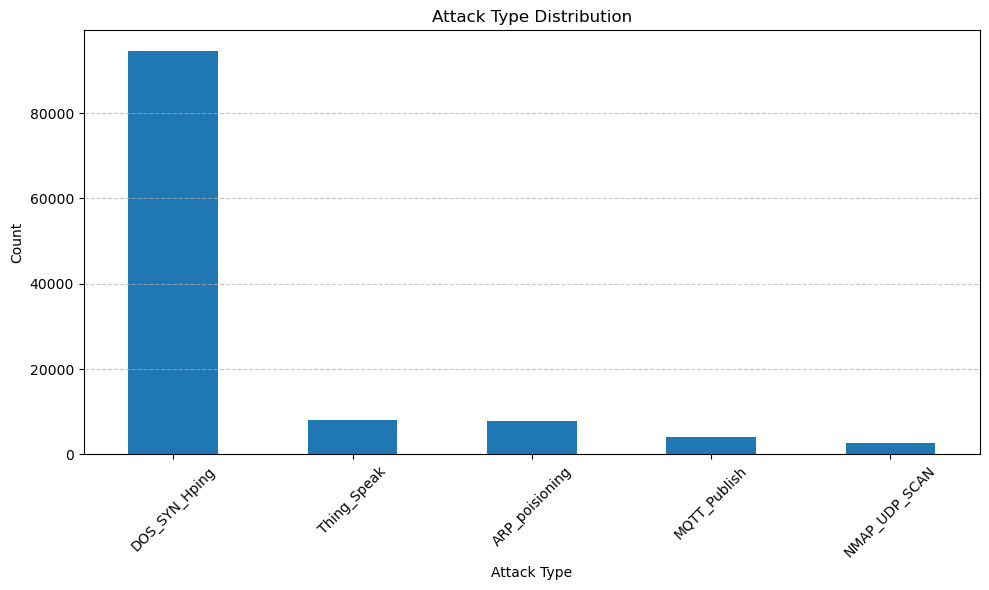

In [ ]:

attack_counts = y.groupby('Attack_type').size().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
attack_counts.plot(kind='bar')
plt.title('Attack Type Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Basic EDA on categorical features

In [ ]:
X.groupby('proto').size()

proto
icmp        57
tcp     110427
udp      12633
dtype: int64

In [ ]:
X.groupby('service').size()

service
-         102861
dhcp          50
dns         9753
http        3464
irc           43
mqtt        4132
ntp          121
radius         2
ssh           28
ssl         2663
dtype: int64

In [ ]:
X.groupby(['proto','service']).size()

proto  service
icmp   -             57
tcp    -          99971
       dns          126
       http        3464
       irc           43
       mqtt        4132
       ssh           28
       ssl         2663
udp    -           2833
       dhcp          50
       dns         9627
       ntp          121
       radius         2
dtype: int64

In [ ]:
df.groupby(['service','Attack_Type']).size()

service  Attack_Type               
-        ARP_poisioning                  546
         DDOS_Slowloris                    6
         DOS_SYN_Hping                 94659
         MQTT_Publish                     11
         NMAP_FIN_SCAN                    24
         NMAP_OS_DETECTION              2000
         NMAP_TCP_scan                  1002
         NMAP_UDP_SCAN                  2411
         NMAP_XMAS_TREE_SCAN            2006
         Thing_Speak                     151
         Wipro_bulb                       45
dhcp     ARP_poisioning                   26
         DDOS_Slowloris                    2
         NMAP_UDP_SCAN                     3
         Thing_Speak                      14
         Wipro_bulb                        5
dns      ARP_poisioning                 5583
         DDOS_Slowloris                    3
         Metasploit_Brute_Force_SSH        8
         NMAP_FIN_SCAN                     3
         NMAP_UDP_SCAN                    31
         NMAP_XMAS_

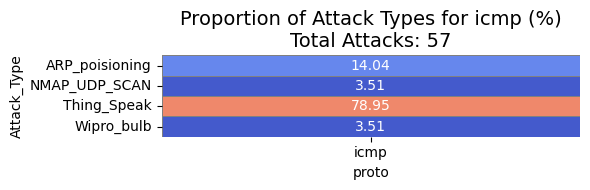

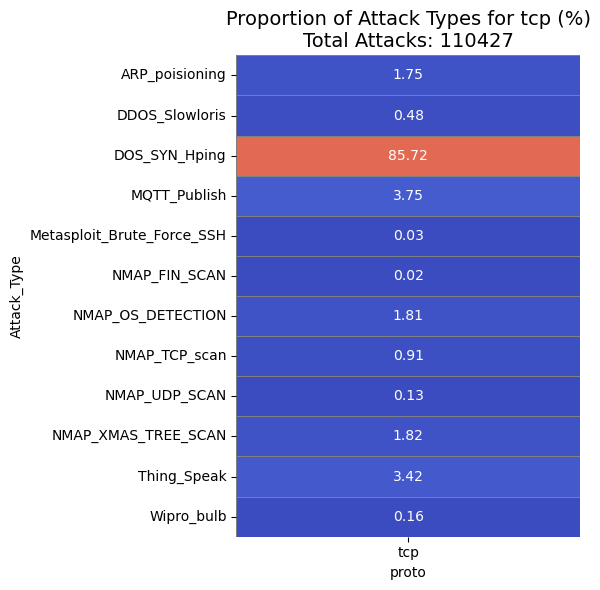

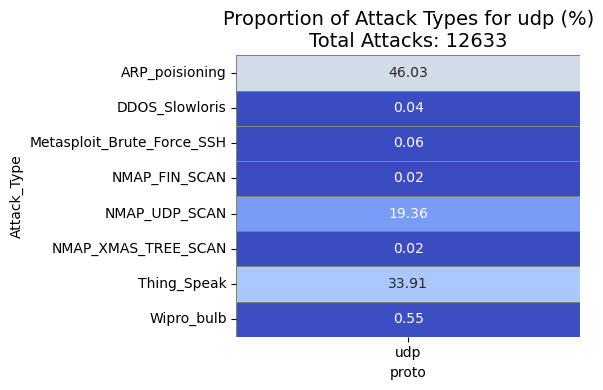

In [ ]:
df = X.copy()
df['Attack_Type'] = y

# attack_type proto grouped
grouped_df = df.groupby(['proto', 'Attack_Type']).size().reset_index(name='count')

# make it a matrix
pivot_df = grouped_df.pivot(index='Attack_Type', columns='proto', values='count').fillna(0)

# attacks for each rotocol
total_attacks_per_protocol = pivot_df.sum(axis=0)

# get percentage
grouped_df_normalized = pivot_df.div(total_attacks_per_protocol, axis=1) * 100

# create heatmaps for each protocol separately
for protocol in grouped_df_normalized.columns:
    filtered_data = grouped_df_normalized[[protocol]].loc[grouped_df_normalized[protocol] > 0]  # Keep non-zero %

    total_attacks = total_attacks_per_protocol[protocol]

    if not filtered_data.empty:
        plt.figure(figsize=(6, len(filtered_data) * 0.5))
        sns.heatmap(filtered_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='gray',
                    vmin=0, vmax=100, cbar=False)
        plt.title(f"Proportion of Attack Types for {protocol} (%)\nTotal Attacks: {int(total_attacks)}", fontsize=14)
        plt.xticks(rotation=0)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()


In [ ]:
df.shape

(123117, 84)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 123117 non-null  int64  
 1   id.resp_p                 123117 non-null  int64  
 2   proto                     123117 non-null  object 
 3   service                   123117 non-null  object 
 4   flow_duration             123117 non-null  float64
 5   fwd_pkts_tot              123117 non-null  int64  
 6   bwd_pkts_tot              123117 non-null  int64  
 7   fwd_data_pkts_tot         123117 non-null  int64  
 8   bwd_data_pkts_tot         123117 non-null  int64  
 9   fwd_pkts_per_sec          123117 non-null  float64
 10  bwd_pkts_per_sec          123117 non-null  float64
 11  flow_pkts_per_sec         123117 non-null  float64
 12  down_up_ratio             123117 non-null  float64
 13  fwd_header_size_tot       123117 non-null  i

In [ ]:
df.describe()

id.orig_p      id.resp_p  flow_duration   fwd_pkts_tot  \
count  123117.000000  123117.000000  123117.000000  123117.000000   
mean    34639.258738    1014.305092       3.809566       2.268826   
std     19070.620354    5256.371994     130.005408      22.336565   
min         0.000000       0.000000       0.000000       0.000000   
25%     17702.000000      21.000000       0.000001       1.000000   
50%     37221.000000      21.000000       0.000004       1.000000   
75%     50971.000000      21.000000       0.000005       1.000000   
max     65535.000000   65389.000000   21728.335580    4345.000000   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
count  123117.000000      123117.000000      123117.000000      1.231170e+05   
mean        1.909509           1.471218           0.820260      3.518063e+05   
std        33.018311          19.635196          32.293948      3.707645e+05   
min         0.000000           0.000000           0.000000      0.000000e+00   
25%         1.000000           1.000000           0.000000      7.454354e+01   
50%         1.000000           1.000000           0.000000      2.467238e+05   
75%         1.000000           1.000000           0.000000      5.242880e+05   
max     10112.000000        4345.000000       10105.000000      1.048576e+06   

       bwd_pkts_per_sec  flow_pkts_per_sec  ...    active.avg    active.std  \
count      1.231170e+05       1.231170e+05  ...  1.231170e+05  1.231170e+05   
mean       3.517620e+05       7.035683e+05  ...  1.481354e+05  2.353599e+04   
std        3.708015e+05       7.415634e+05  ...  1.613007e+06  1.477935e+06   
min        0.000000e+00       0.000000e+00  ...  0.000000e+00  0.000000e+00   
25%        7.288927e+01       1.490871e+02  ...  9.536740e-01  0.000000e+00   
50%        2.467238e+05       4.934475e+05  ...  4.053116e+00  0.000000e+00   
75%        5.242880e+05       1.048576e+06  ...  5.006790e+00  0.000000e+00   
max        1.048576e+06       2.097152e+06  ...  4.374931e+08  4.774862e+08   

           idle.min      idle.max      idle.tot      idle.avg      idle.std  \
count  1.231170e+05  1.231170e+05  1.231170e+05  1.231170e+05  1.231170e+05   
mean   1.616655e+06  1.701956e+06  3.517644e+06  1.664985e+06  4.550183e+04   
std    8.809396e+06  9.252337e+06  1.229508e+08  9.007064e+06  1.091361e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    3.000000e+08  3.000000e+08  2.096777e+10  3.000000e+08  1.208029e+08   

       fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  
count         123117.000000         123117.000000         123117.000000  
mean            6118.905123           2739.776018            751.647514  
std            18716.313861          10018.848534           6310.183843  
min                0.000000              0.000000              0.000000  
25%               64.000000              0.000000             64.000000  
50%               64.000000              0.000000             64.000000  
75%               64.000000              0.000000             64.000000  
max            65535.000000          65535.000000          65535.000000  

[8 rows x 81 columns]

In [ ]:
df.isnull().sum()

id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_Type             0
Length: 84, dtype: int64

In [ ]:
df.duplicated().sum()

5195

Attack_Type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64


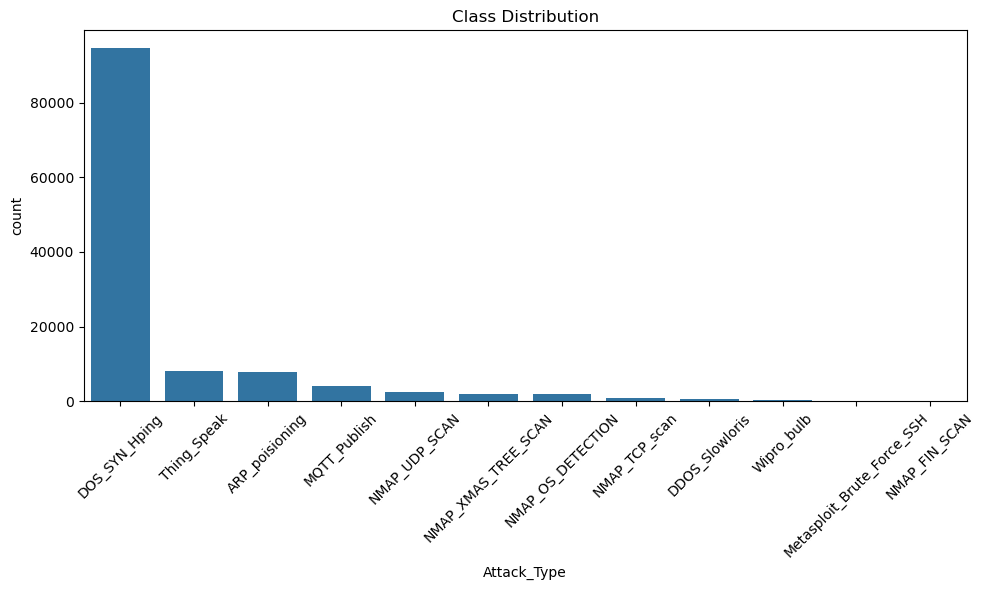

In [ ]:
# Value counts for label
print(df['Attack_Type'].value_counts())

# Plot class distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Attack_Type', order=df['Attack_Type'].value_counts().index)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


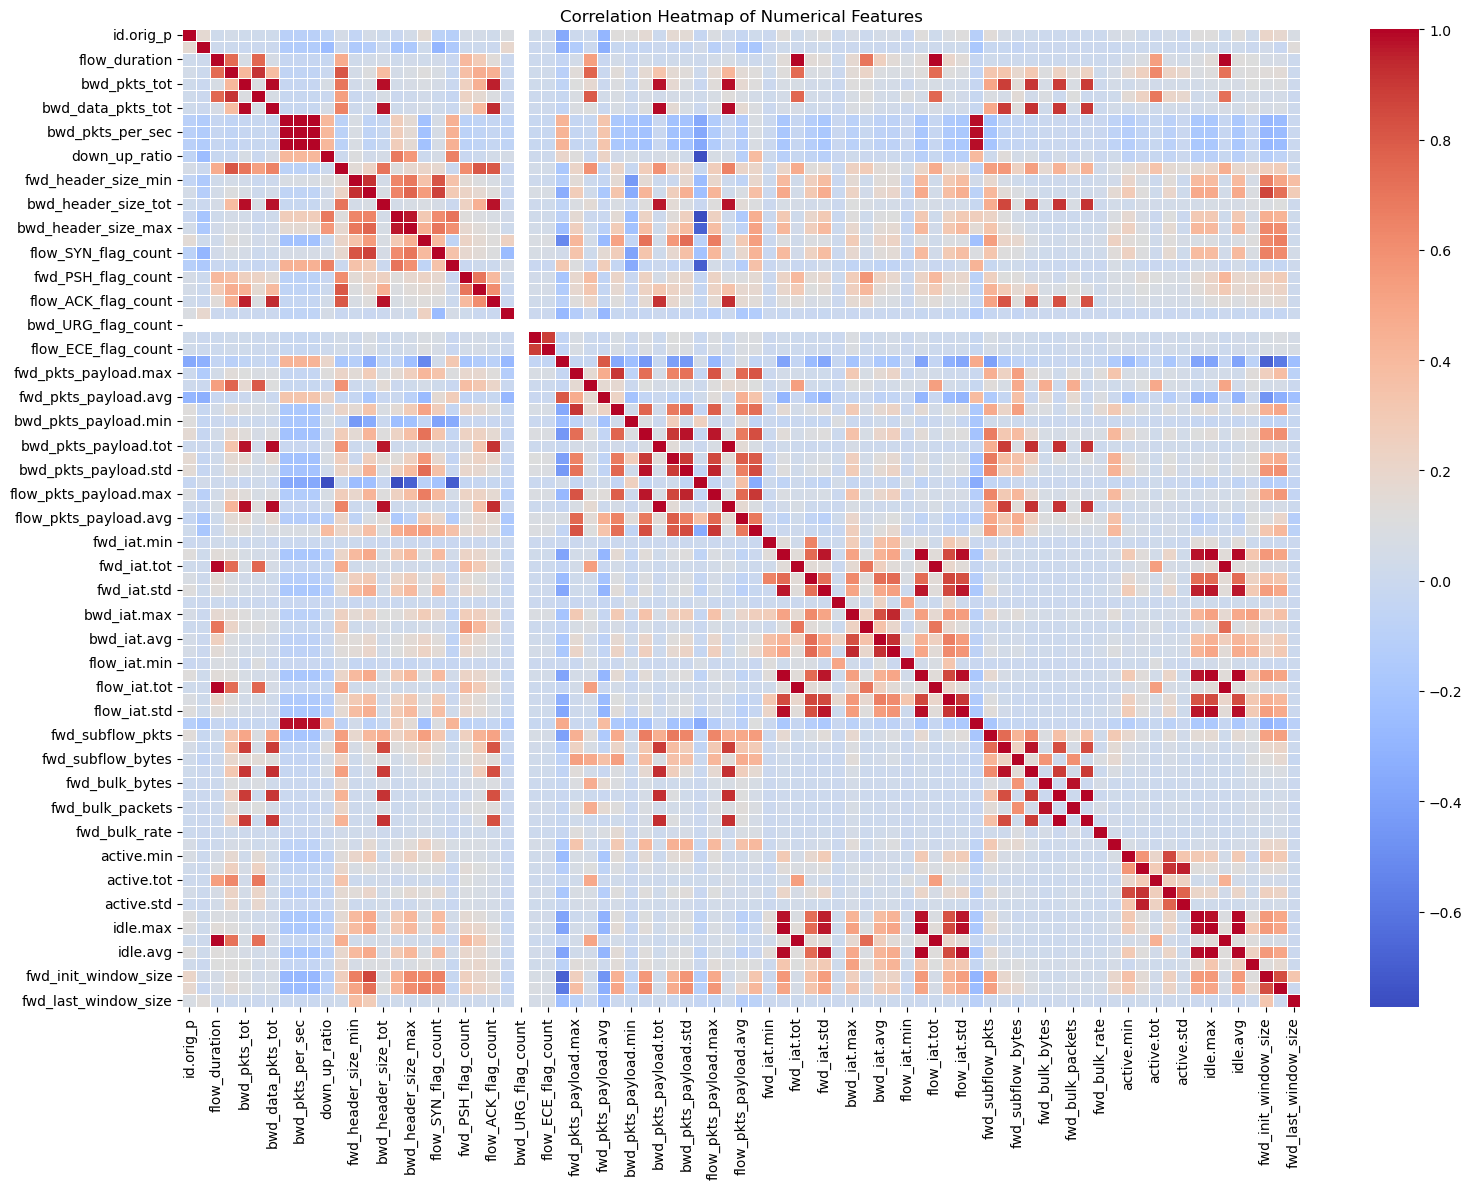

In [ ]:
# Compute correlation matrix for numerical features
corr_matrix = df.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


In [ ]:
# Set a threshold for high correlation
threshold = 0.8

# Get the correlation matrix
corr_matrix = df.select_dtypes(include='number').corr().abs()

# Mask the upper triangle to avoid duplicates
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
filtered_corr = corr_matrix.mask(mask)

# Find pairs with high correlation
high_corr_pairs = filtered_corr.stack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs > threshold]

print("Highly correlated feature pairs (|corr| > 0.8):")
print(high_corr_pairs)


Highly correlated feature pairs (|corr| > 0.8):
flow_iat.tot           flow_duration           1.000000
flow_pkts_per_sec      bwd_pkts_per_sec        0.999997
                       fwd_pkts_per_sec        0.999997
bwd_pkts_per_sec       fwd_pkts_per_sec        0.999986
bwd_bulk_packets       bwd_bulk_bytes          0.999802
                                                 ...   
flow_pkts_payload.std  fwd_pkts_payload.max    0.813693
fwd_header_size_tot    fwd_pkts_tot            0.808293
bwd_PSH_flag_count     fwd_header_size_tot     0.802574
flow_ACK_flag_count    fwd_header_size_tot     0.802144
fwd_pkts_payload.avg   fwd_pkts_payload.min    0.800071
Length: 118, dtype: float64


C:\Users\emrec\AppData\Local\Temp\ipykernel_12584\2226910847.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Attack_Type', y=feature, palette='Set2')


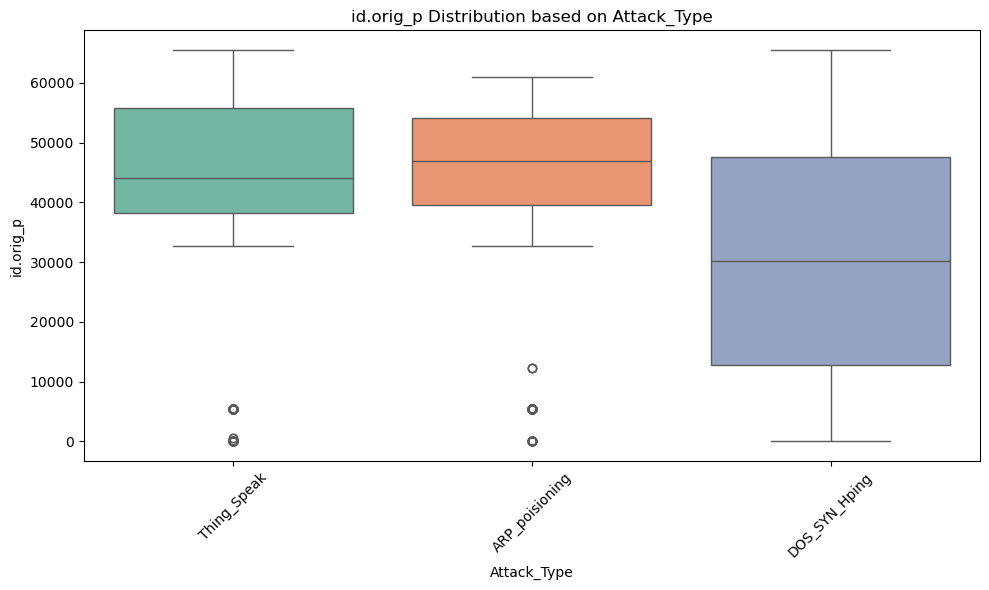

In [ ]:
feature = filtered_df.select_dtypes(include='number').columns[0]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Attack_Type', y=feature, palette='Set2')
plt.title(f'{feature} Distribution based on Attack_Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\emrec\AppData\Local\Temp\ipykernel_12584\2204335221.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='Attack_Type', y=feature, palette='Set2')


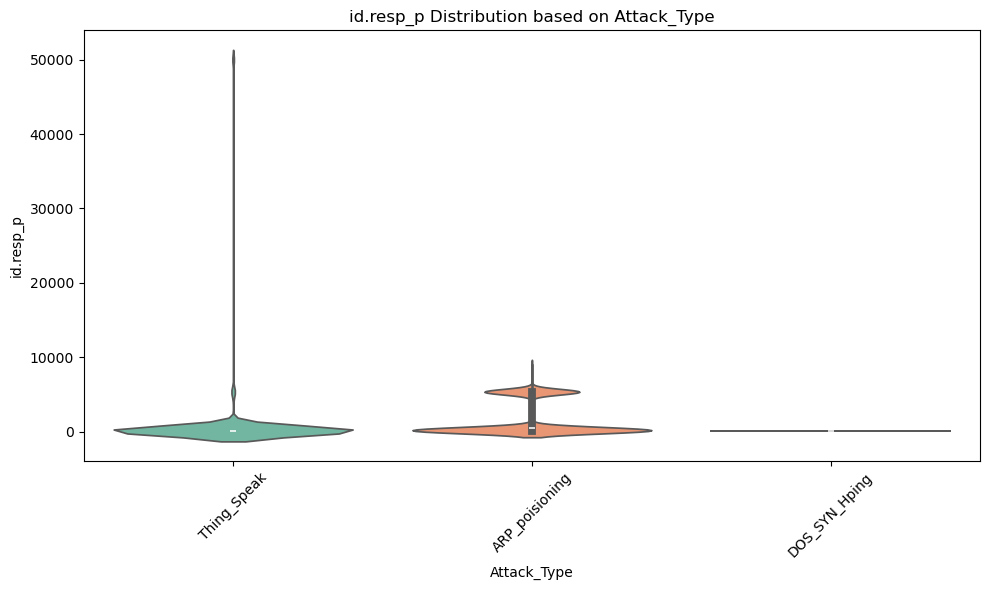

In [ ]:
feature = filtered_df.select_dtypes(include='number').columns[1]

plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_df, x='Attack_Type', y=feature, palette='Set2')
plt.title(f'{feature} Distribution based on Attack_Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\emrec\AppData\Local\Temp\ipykernel_12584\1034801942.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='proto', order=df['proto'].value_counts().index, palette='Set3')


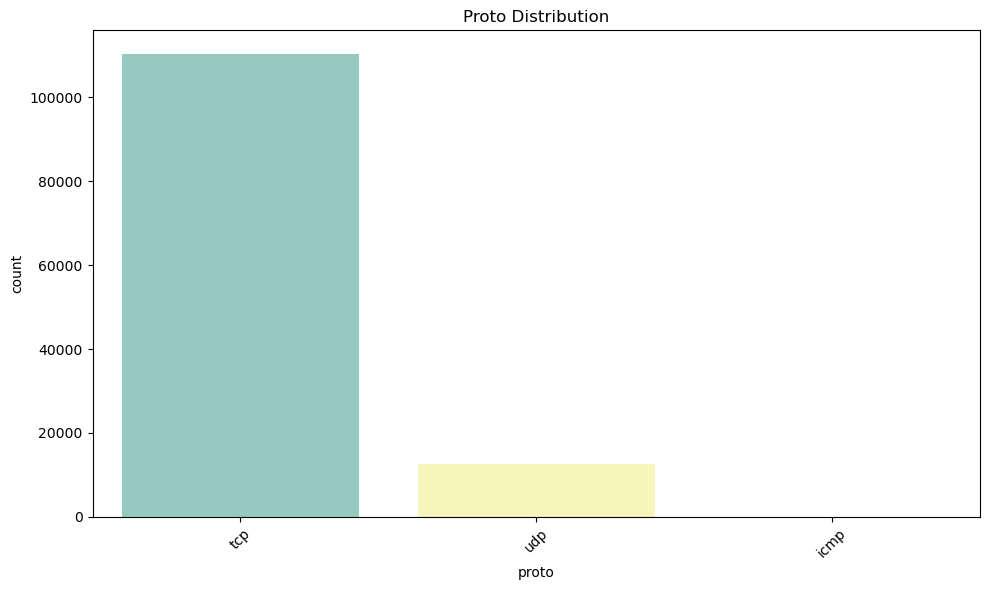

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='proto', order=df['proto'].value_counts().index, palette='Set3')
plt.title('Proto Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\emrec\AppData\Local\Temp\ipykernel_12584\3793862398.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['service'].isin(top_services)], x='service', order=top_services, palette='Set2')


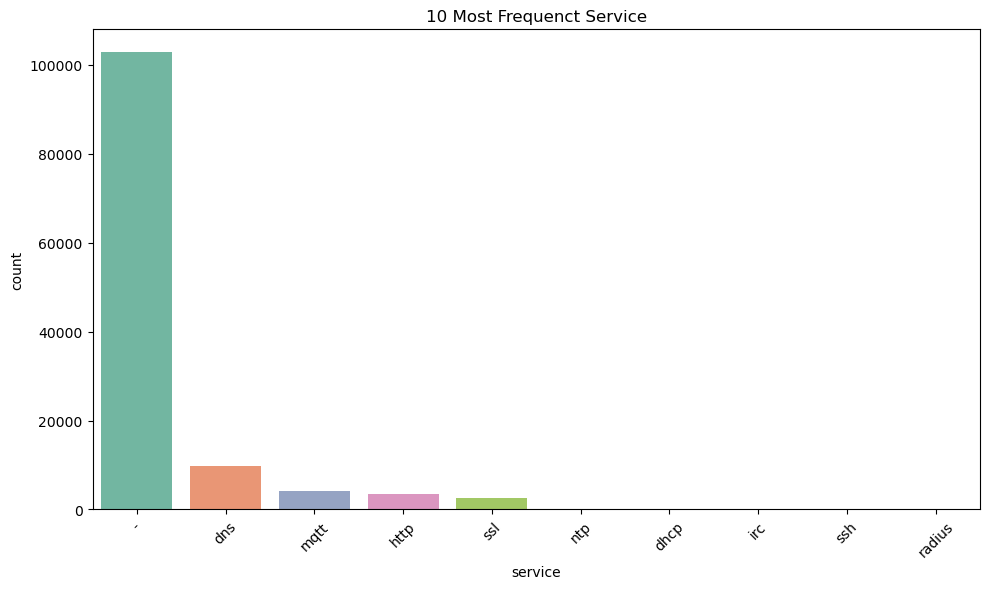

In [ ]:
top_services = df['service'].value_counts().nlargest(10).index  # ilk 10
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['service'].isin(top_services)], x='service', order=top_services, palette='Set2')
plt.title('10 Most Frequenct Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


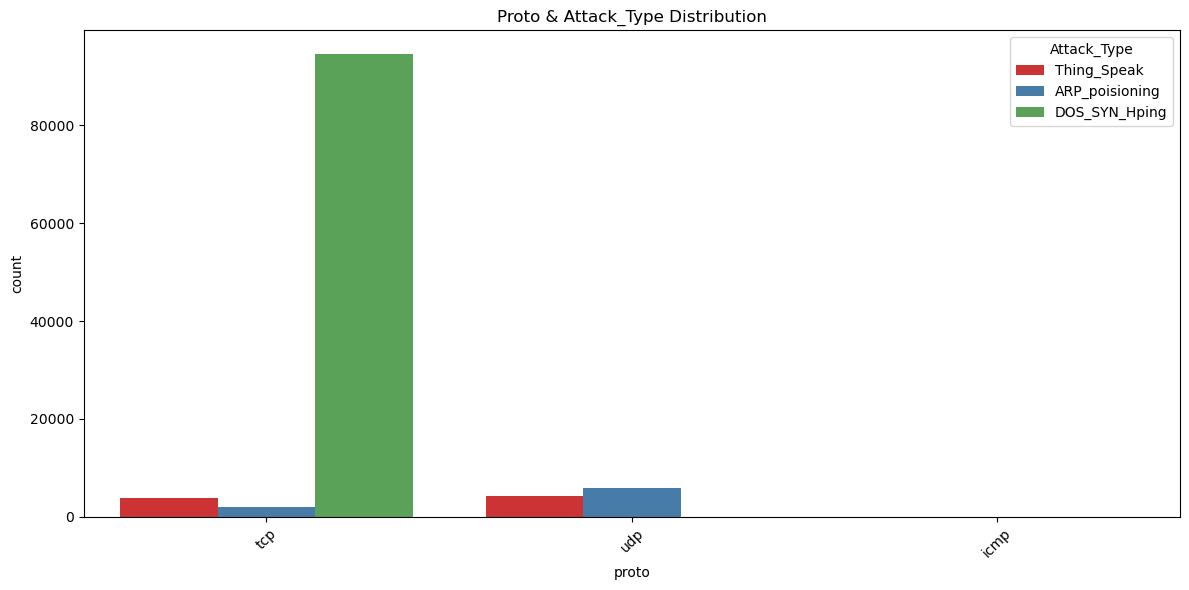

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='proto', hue='Attack_Type', palette='Set1')
plt.title('Proto & Attack_Type Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


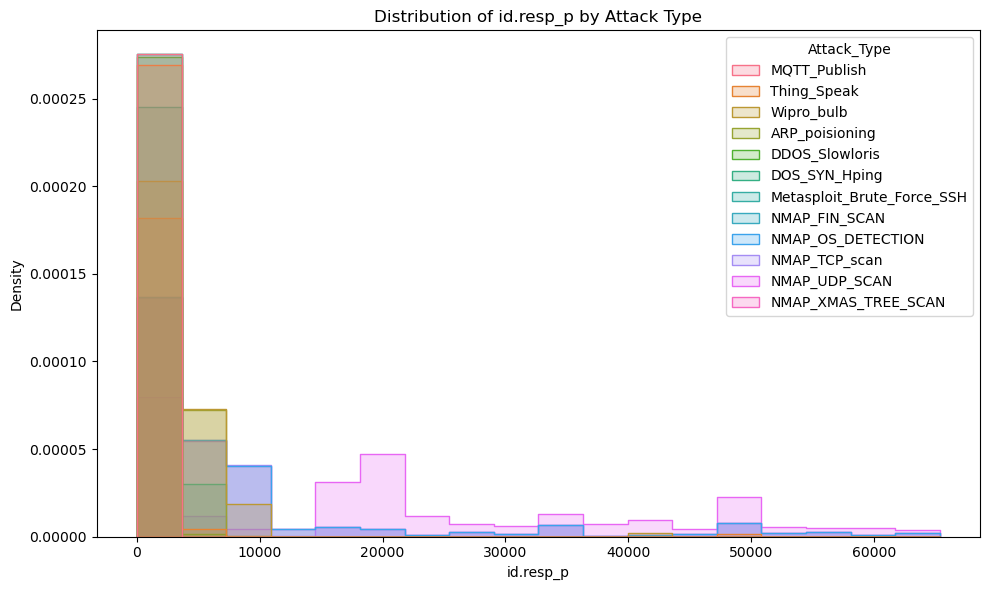

In [ ]:
# Plot histogram for a selected feature by attack type
feature = df.select_dtypes(include='number').columns[1]

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=feature, hue='Attack_Type', element='step', stat='density', common_norm=False)
plt.title(f'Distribution of {feature} by Attack Type')
plt.tight_layout()
plt.show()
